#                  AI PROJECT 2020-21 Restaurant Rating Prediction

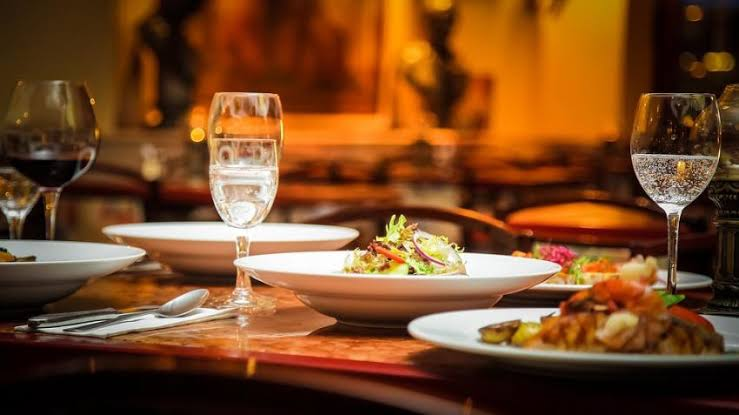

### By:
### Akshaya Gangurde (18070124007)
### Chhavi Gupta (18070122015)
### Vattikuti Sree Sahithi (18070122077)

After finding a perfect blend of modernity and then blending with tradition, Bangalore has managed to rise the ranks from merely being a garden city to become one of the most sought-after cities in the world. Some of these best restaurants in Bangalore are a testament to the changing times in Karnataka’s capital which has evolved into a rich and diverse food paradise for travelers and locals alike.

As the old saying goes- “ for every job, there is a perfect weapon”. The same can be said about the food scene in Bangalore. These restaurants have not merely cropped up as per to the adventurous exploits of restaurateurs, but also keeping in mind the cosmopolitan audience and diverse palette the citizens have developed.

Here are some of the best restaurants in Bangalore that provide you the perfect place to eat, socialize, and mingle for every specific situation.

Data Description

- url : This feature contains the url of the restaurant on the Zomato website
- address : This feature contains the address of the restaurant in Bangalore
- name : This feature contains the name of the restaurant
- online_order : whether online ordering is available in the restaurant or not
- book_table : table book option available or not
- rate : contains the overall rating of the restaurant out of 5
- votes : contains total number of upvotes for the restaurant
- phone : contains the phone number of the restaurant
- location : contains the neighborhood in which the restaurant is located
- rest_type : restaurant type
- dish_liked : dishes people liked in the restaurant
- cuisines : food styles, separated by comma
- approx_cost(for two people) : contains the approximate cost of meal for two people
- reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
- menu_item : contains list of menus available in the restaurant
- listed_in(type) : type of meal
- listed_in(city) : contains the neighborhood in which the restaurant is located

We predicted rating of restaurants based on features like type of restaurant type, dishes liked, approximate cost, online order, etc. The basic idea of analyzing the zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bangalore, aggregate rating of each restaurant is based of factors like location, type of restaurant and many more details. We have performed Exploratory Data Analysis bringing out insights regarding which location has highest number of restaurants, how many restaurants are accepting online orders and so on...
Next, we trained 4 models on preprocessed dataset which work to predict the rating of restaurants and performed a comparitive study between them.

In [1]:
#importing the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings #for deprecation warnings
warnings.filterwarnings('ignore')

In [3]:
#load the dataset
zomato_df = pd.read_csv('zomato.csv')
zomato_df.head() #getting insights of datasets

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_df.shape #dimension of dataset

(51717, 17)

In [5]:
zomato_df.info()  #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zomato_df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
# dropping the unnecessary columns
zomato_df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [9]:
#checking duplicate value
zomato_df.duplicated().sum()

43

In [10]:
# dropping the duplicates value from the dataset
zomato_df.drop_duplicates(inplace=True)

In [11]:
#missing values
zomato_df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

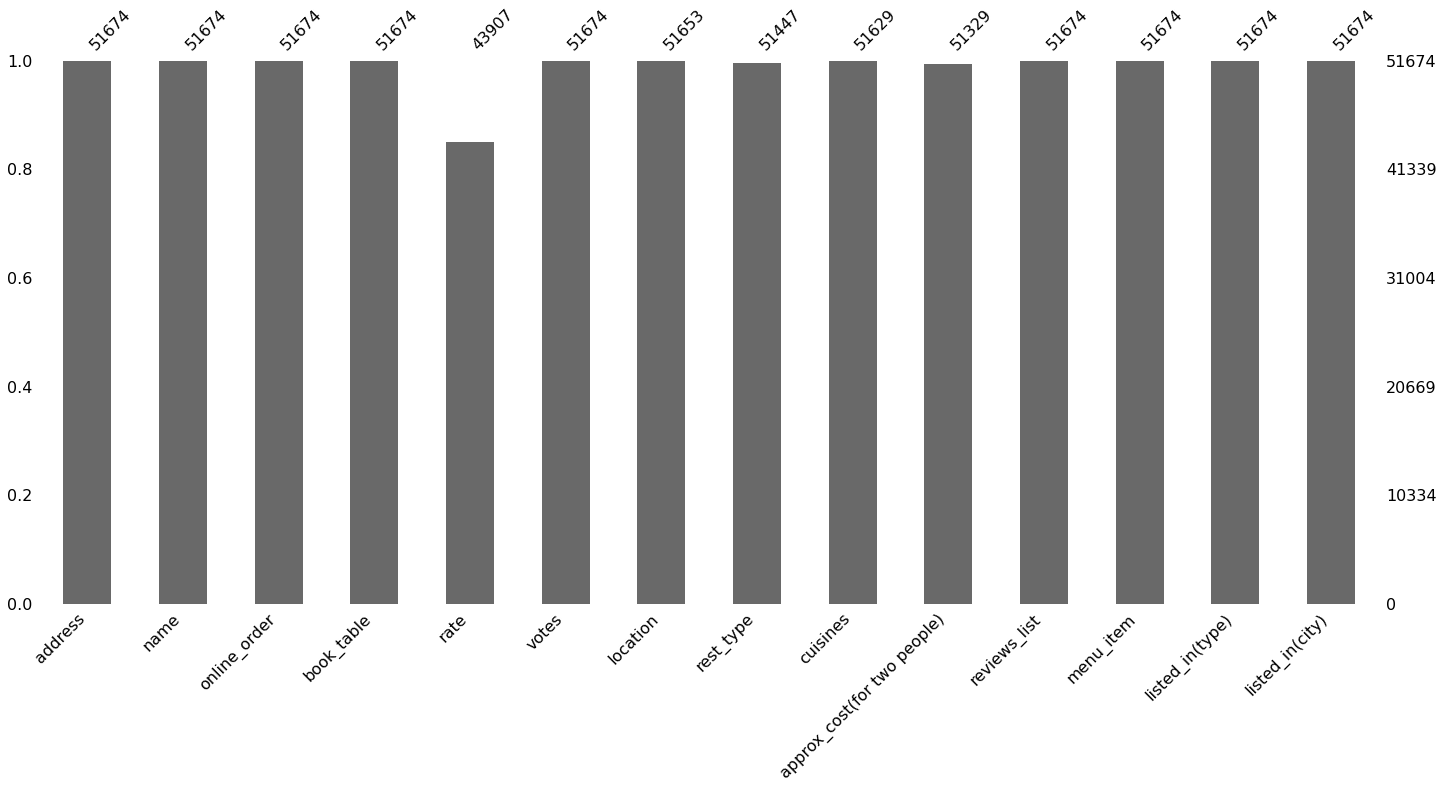

In [12]:
import missingno as msno #visualize the distribution of NaN values
msno.bar(zomato_df)
plt.show()

In [13]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

In [14]:
# dropping the null value from the dataset
zomato_df.dropna(how='any',inplace=True)

In [15]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [16]:
zomato_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
#renaming the columns
zomato_df=zomato_df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

zomato_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [18]:
zomato_df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [20]:
zomato_df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [21]:
#Some transformations
zomato_df.cost = zomato_df.cost.apply(lambda x: int(x.replace(',','')))
zomato_df.cost = zomato_df.cost.astype('int') 

In [22]:
zomato_df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [23]:
zomato_df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [24]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  int32 
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int32(1), int64(1), object(12)
memory usage: 4.8+ MB


In [25]:
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [26]:
#Removing '/5' from Rates
zomato_df = zomato_df.loc[zomato_df.rate !='NEW']
zomato_df = zomato_df.loc[zomato_df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato_df.rate = zomato_df.rate.apply(remove_slash).str.strip().astype('float')
zomato_df['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [27]:
# Adjust the column names
zomato_df.name = zomato_df.name.apply(lambda x:x.title())
zomato_df.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato_df.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato_df.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [28]:
#Encode the input Variables
def Encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(['rate', 'cost', 'votes'])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = Encode(zomato_df.copy())
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

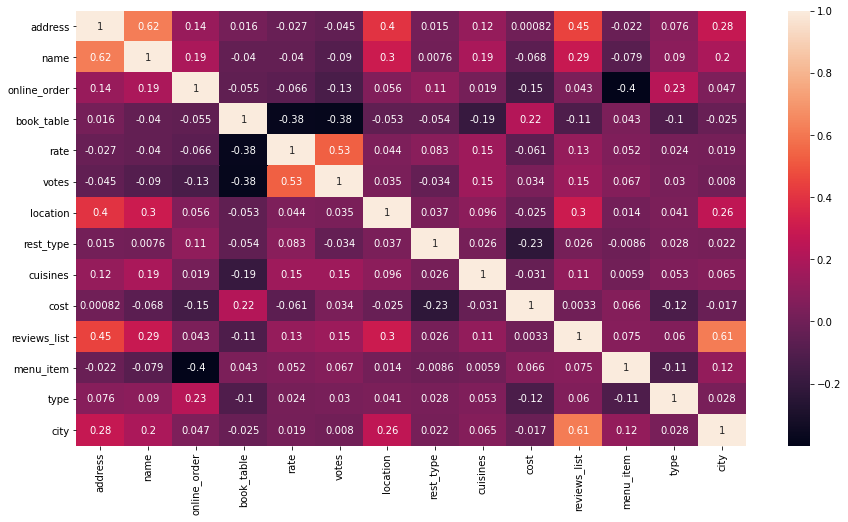

In [26]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

# **Exploratory Data Analysis**

**Restaurants delivering Online or not**

Text(0.5, 1.0, 'Restaurants delivering online or not')

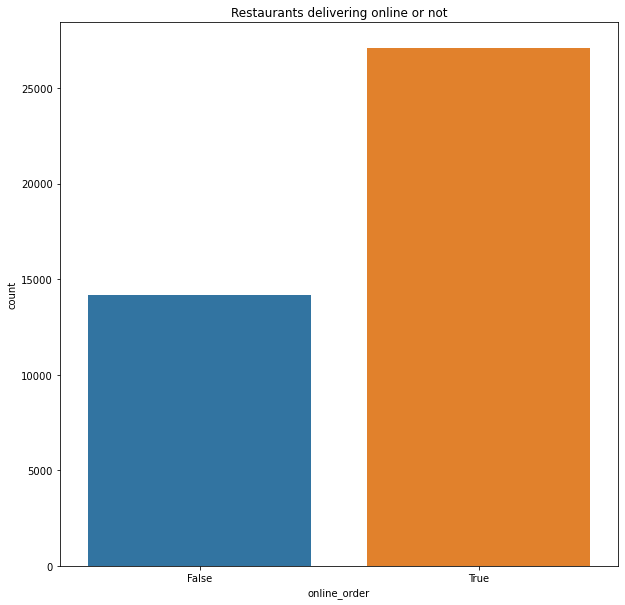

In [29]:
sns.countplot(zomato_df['online_order']) #countplot for categorical data
fig=plt.gcf()    #get current figure
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or not')

**Restaurants allowing table booking or not**

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

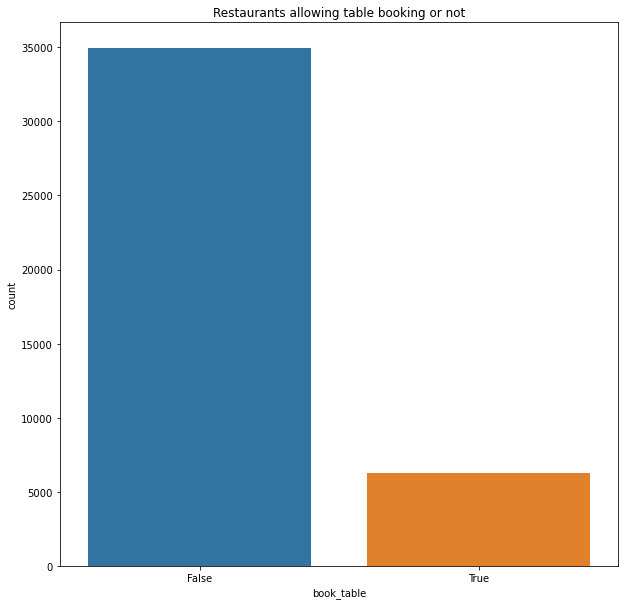

In [30]:
sns.countplot(zomato_df['book_table'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

**Location**

Text(0.5, 1.0, 'Location wise count for restaurants')

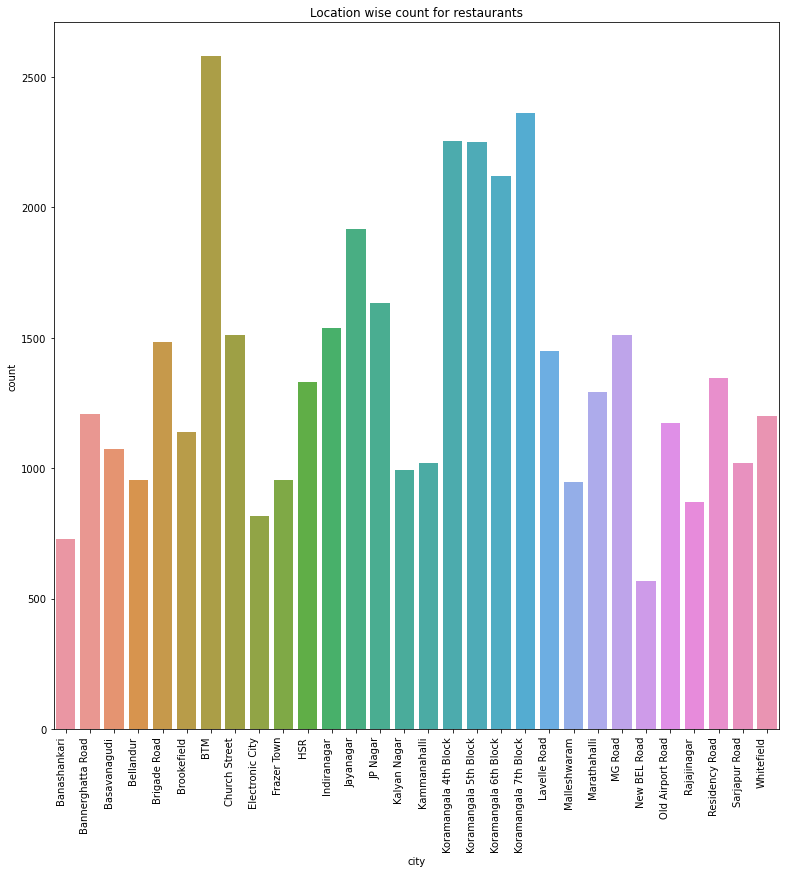

In [31]:
sns.countplot(zomato_df['city']) 
sns.countplot(zomato_df['city']).set_xticklabels(sns.countplot(zomato_df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

**Types of Services**

Text(0.5, 1.0, 'Type of Service')

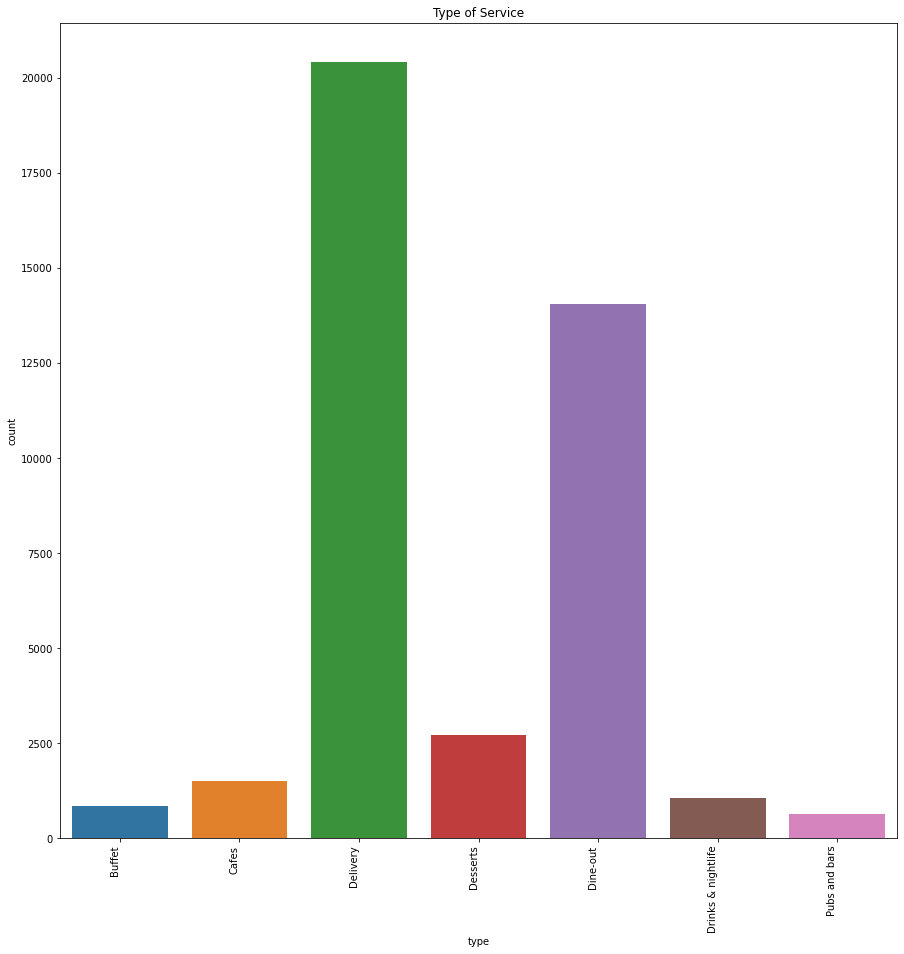

In [32]:
sns.countplot(zomato_df['type'])
sns.countplot(zomato_df['type']).set_xticklabels(sns.countplot(zomato_df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

**Type and Rating**

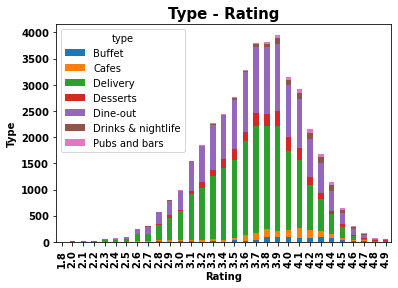

In [33]:
type_plt=pd.crosstab(zomato_df['rate'],zomato_df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

**No. of Restaurants in a Location**

Text(0.5, 1.0, 'NO. of restaurants in a Location')

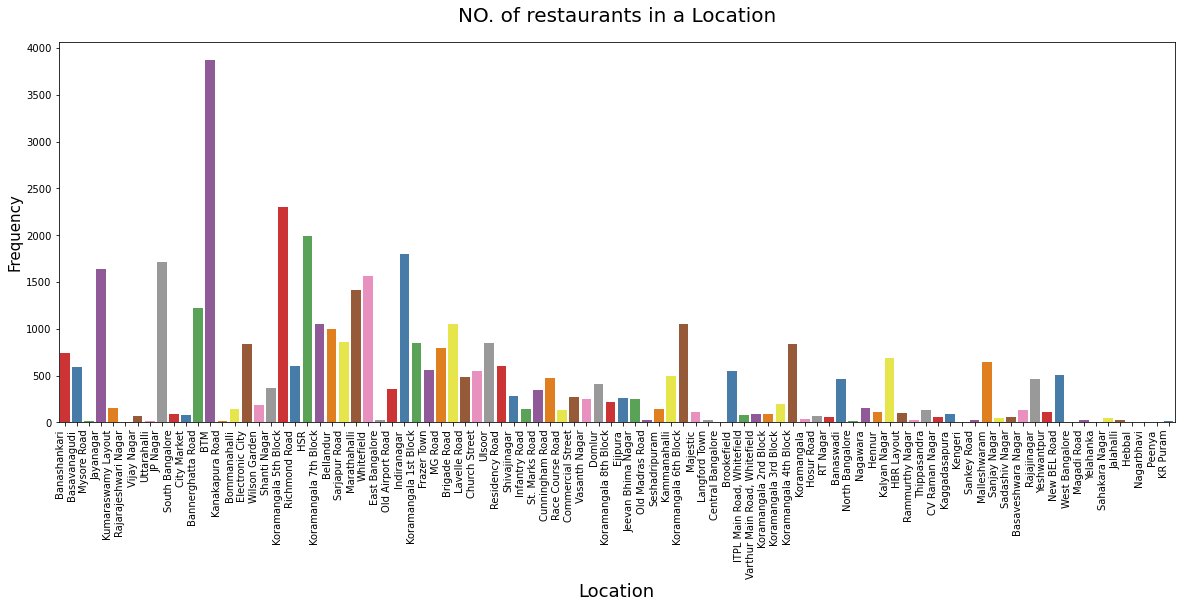

In [34]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

**Restaurant type**

Text(0.5, 1.0, 'Restaurant types')

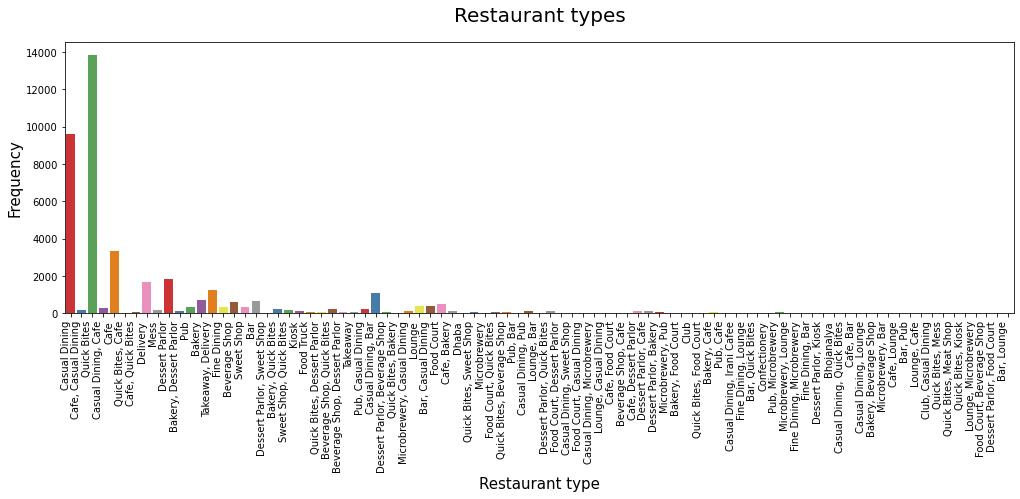

In [35]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

**Most famous Restaurant chains in Bengaluru**

Text(0.5, 0, 'Number of outlets')

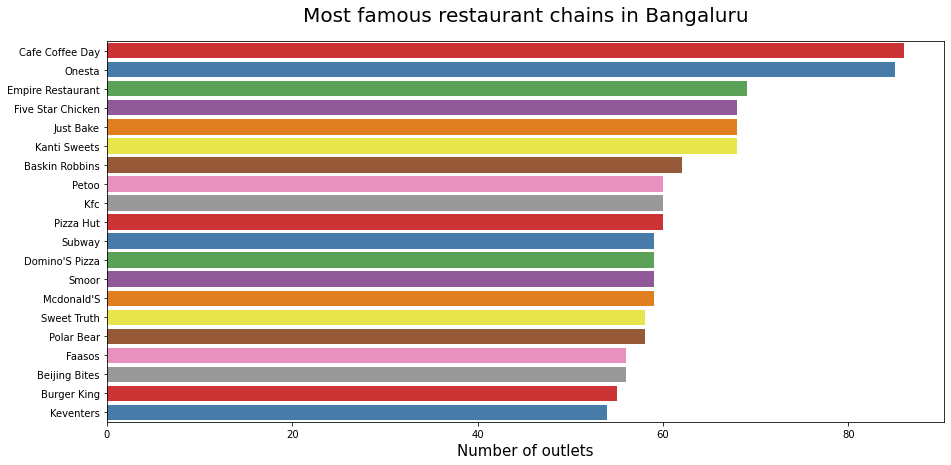

In [36]:
plt.figure(figsize=(15,7))
chains=zomato_df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

# MODELS

In [37]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
16950,0,1,0,8,2,5,250,0
767,0,1,131,8,4,278,400,190
6750,0,1,137,45,2,1295,250,0
9471,0,1,74,16,0,537,1000,0
25162,0,1,61,12,2,1860,350,0


**1.LinearRegression**

In [38]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.28439494620022565

**2.LASSO REGRESSION**

In [39]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [40]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train, y_train)

r2_score(y_test,lasso.predict(x_test))

0.2843947915842868

**3.DecisionTreeRegressor**

In [41]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.8478189569732784

**4.RandomForestRegressor**

In [42]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.8738621961325526

In [43]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.873862
2,Decision Tree,0.847819
0,Linear Regression,0.284395
1,Lasso Regression,0.284395


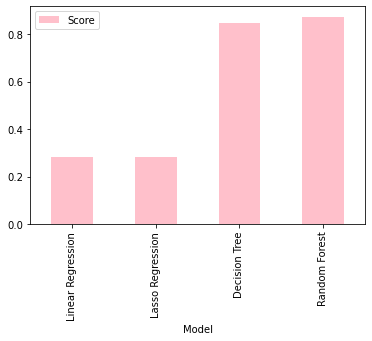

In [44]:
df = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test)]
})
df.plot(x ='Model', y='Score', kind = 'bar', color ='pink')
plt.show()



# Conclusion:
After applying several models like Decision Tree, Linear Regression, Lasso Regression and Random Forest, Random Forest has yielded the best accuracy, coming out to be 87%.